# Morphology Tutorial

Mathematical morphology (MM) is a theoretical model for digital images built upon lattice theory and topology. It is the foundation of morphological image processing, which is based on shift-invariant (translation invariant) operators.Originally developed for binary images it has now been successfully extend to grey scale images.

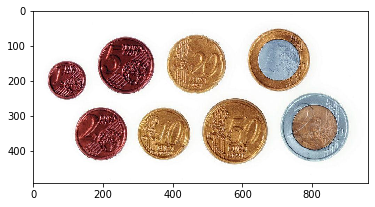

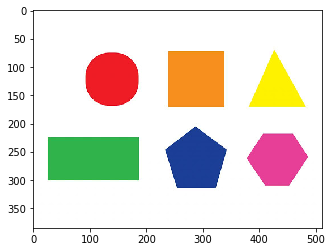

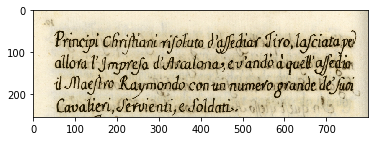

In [103]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

images = {}
for x in os.listdir("images"):
    images[x] = cv2.imread("images/" + x)
    temp = images[x][:,:,::-1]
    plt.imshow(temp, interpolation='nearest')
    plt.show()
    

<b style="font-size:18px;">Exercise 1.0 - Connected Components</b>

Using opencv research how to use connectedComponents() function.  
Download image shapes.jpg and euro_coins.jpg. Apply the connected components function to segment the objects in the image. You can if you want also use the findContour() opencv method to extract the ROI (seperate shapes as new images). Vary the connectivity value (4 or 8) and document results. 

<i style="color:red">Do not forget to convert the image to binary, your objects should be white.</i>



The openCV connected component function takes as input a thresholded image. For this reason, the target image was first converted to grayscale, and then thresholded. A light blur was also applied to the image to smooth out any ruff edges. This helped in removing gaps in the coins image. The images was then fed into the cv.connectedComponents() function along with a connectivity value. The connectivity value was varied between 4 and 8. For a value of 8 both images produce accurate labels for there respective components. However, for a connectivity value of 4 the program only gives an output for coins image. The reason for this is unknown but there were some resent git issues regarding updates causing this problem. The coins image with connectivity value 4 appears to be working the same as with connectivity 8. I think this is because there are no tight diagonal connections in the coins image. The produced labels are then given different colours and displayed as a new image. Each colour on the output image represents a different connected component. 

C:\Users\maxma\AppData\Local\Temp\ipykernel_2268\87426032.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


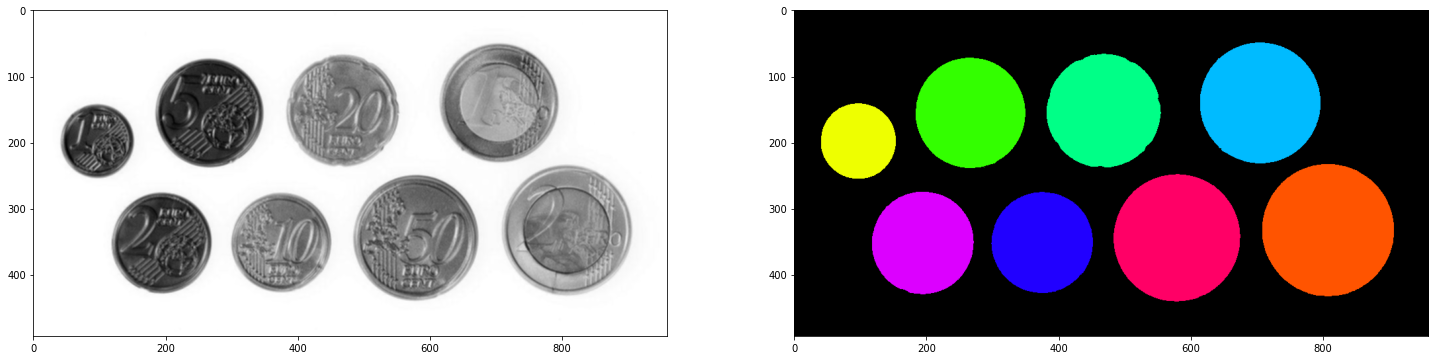

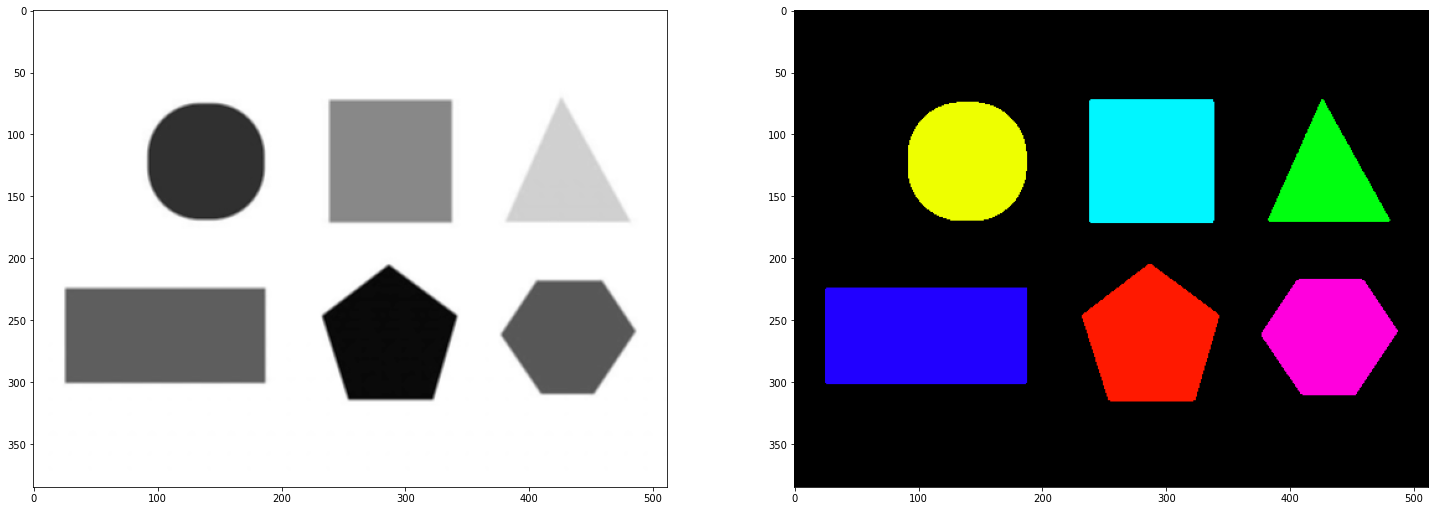

In [105]:
def conComp(image, thresholdValue):	
    blur = cv2.blur(image,(3,3))
    grayImage = cv2.cvtColor(blur, cv2.COLOR_RGB2GRAY) #images[os.listdir("images")[2]]
    i = cv2.threshold(grayImage, thresholdValue, 255, cv2.THRESH_BINARY_INV)[1]

    contours, hierarchy = cv2.findContours(image=i, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
    ret, labels = cv2.connectedComponents(i, connectivity=8)
    label_hue = np.uint8(176*labels/np.max(labels))
    temp = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, temp, temp])
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
    labeled_img[label_hue==0] = 0

    fig = plt.figure(figsize=(25, 20))
    ax1, ax2= fig.add_subplot(121), fig.add_subplot(122)
    ax1.imshow(grayImage, cmap='gray')
    ax2.imshow(labeled_img)
    fig.show()

    return contours

t = conComp(images[os.listdir("images")[0]][:,:,::-1], 240)
t = conComp(images[os.listdir("images")[1]][:,:,::-1], 230)

<b style="font-size:18px;">Exercise 1.1 - Dilation</b>

Download the image file handwritten text.png from VLE. Apply the opencv method for dilation (dilate()). Vary the dilation filter and compare results using histograms. What can you observe?

On initial inspection it appears like the dilation and erosion functions, provided by open cv, are doing the opposite of what they should be. Assuming that the open cv functions are correct, the dilation function appears to reduce the intensity of values close to 0 and increase the intensity close to 255. I expect that this is happening as the amount of dark colour in the image dissipates, the values of certain pixels change from low too high to accommodate the brighter colours. 

C:\Users\maxma\AppData\Local\Temp\ipykernel_2268\2604350079.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\maxma\AppData\Local\Temp\ipykernel_2268\2604350079.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


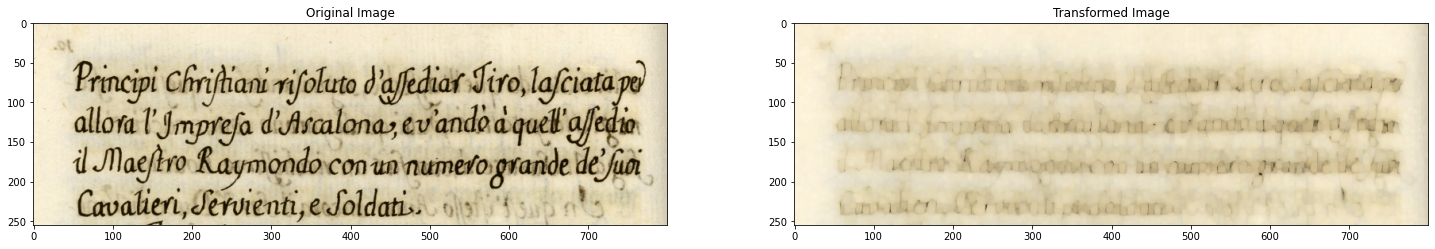

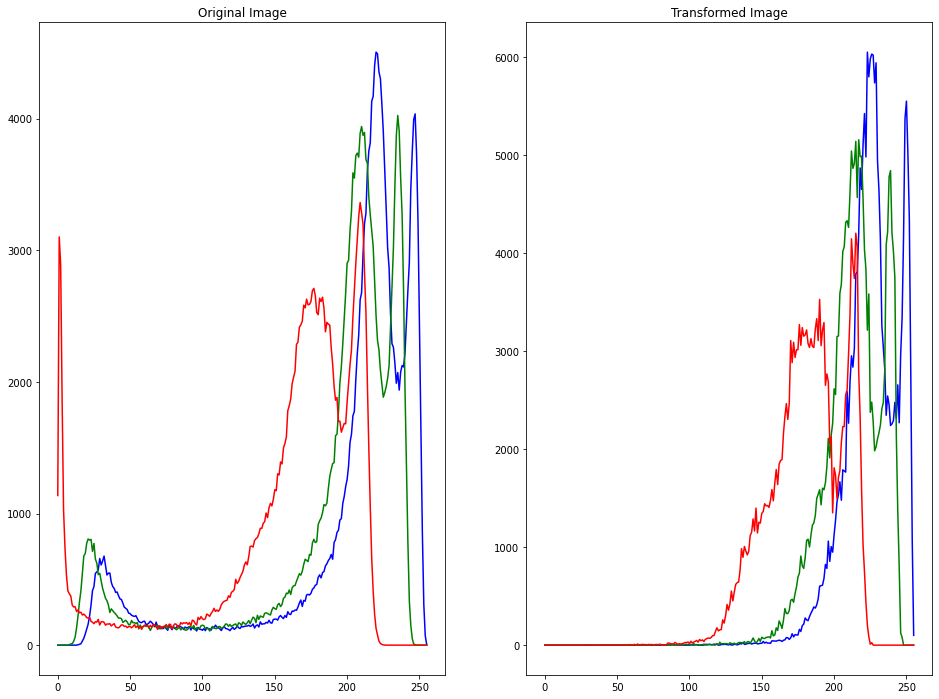

In [4]:
def showImages(img1, img2):
    fig = plt.figure(figsize=(25, 20))
    ax1, ax2= fig.add_subplot(121), fig.add_subplot(122)
    ax1.set_title("Original Image")
    ax2.set_title("Transformed Image")
    ax1.imshow(img1)
    ax2.imshow(img2, cmap='gray')
    fig.show()

def plotHist(img, outImg):
    colours = ('b', 'g', 'r')
    fig = plt.figure(figsize=(16, 12))
    ax1, ax2= fig.add_subplot(121), fig.add_subplot(122)
    for i, colour in enumerate(colours):
        hist1 = cv2.calcHist([img], [i], None, [256], [0,256])
        hist2 = cv2.calcHist([outImg], [i], None, [256], [0,256])
        ax1.set_title("Original Image")
        ax2.set_title("Transformed Image")
        ax1.plot(hist1, color = colour)
        ax2.plot(hist2, color = colour)
    fig.show()

def dilation(image, dF1, dF2):
    kernel = np.ones((dF1, dF2), np.uint8)
    d = cv2.dilate(image, kernel, iterations = 1)

    return d

img2 = dilation(images[os.listdir("images")[2]][:,:,::-1], 5, 5)
showImages(images[os.listdir("images")[2]][:,:,::-1], img2)
plotHist(images[os.listdir("images")[2]][:,:,::-1], img2)

<b style="font-size:18px;">Exercise 1.2 - Erosion</b>

Using the same text based image from the previous exercise apply the opencv method for erosion (erode()). Vary the erosion filter and compare results using histograms. What can you observe?

Following what was mentioned in the above exercise, and assuming the OpenCV function are correct, the erosion function appears to do the opposite of the dilation function. i.e., values on the histogram close to 0 increase while values close to 255 decreases. I believe that this is because there are more dark pixels on the screen and therefore lower overall values.

C:\Users\maxma\AppData\Local\Temp\ipykernel_2268\2604350079.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\maxma\AppData\Local\Temp\ipykernel_2268\2604350079.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


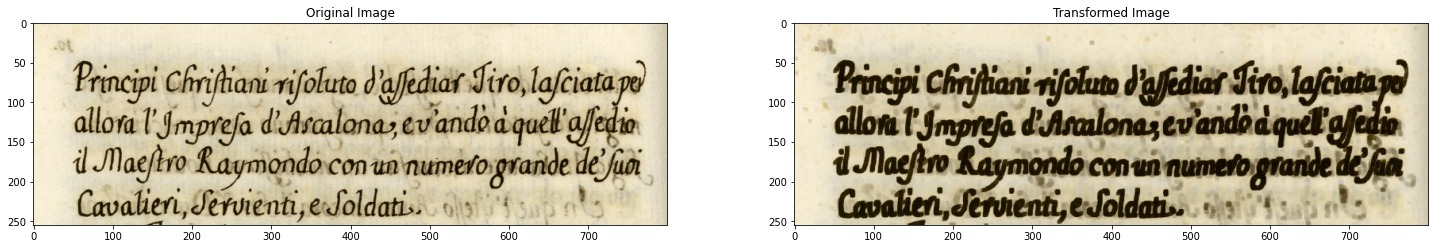

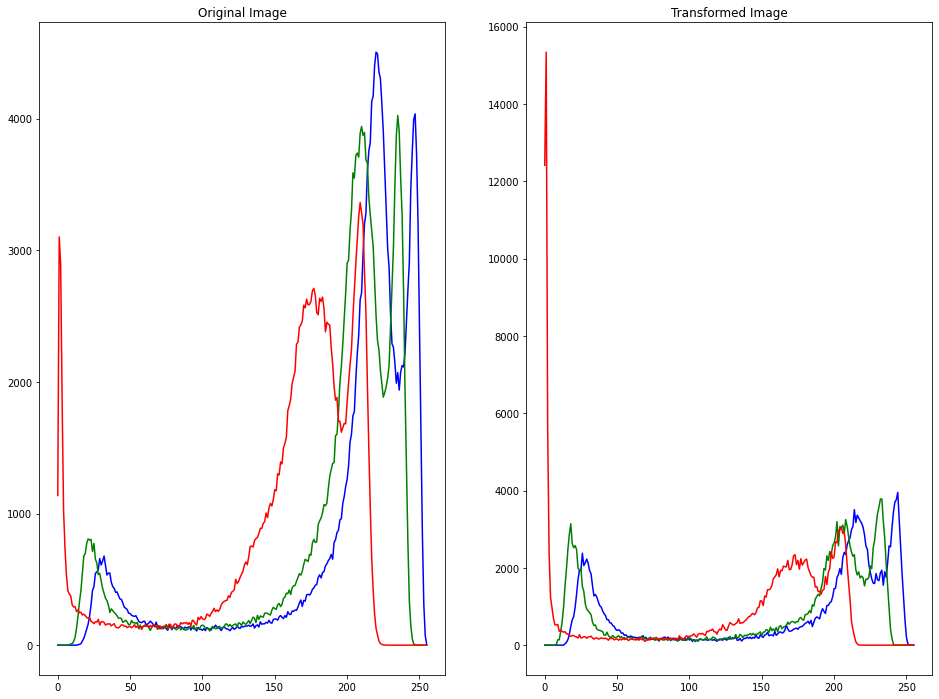

In [5]:
def erosion(image, dF1, dF2):
    kernel = np.ones((dF1, dF2), np.uint8)
    d = cv2.erode(image, kernel, iterations = 1)

    return d

img2 = erosion(images[os.listdir("images")[2]][:,:,::-1], 4, 4)
showImages(images[os.listdir("images")[2]][:,:,::-1], img2)
plotHist(images[os.listdir("images")[2]][:,:,::-1], img2)

<b style="font-size:18px;">Exercise 1.3 - Opening</b>

Opening is an applied process of erosion followed by dilation. It is typically used to segment neck parts of shapes found within an image. 

It is also used in Text segmentation to seperate lines and words and sometimes characters.
Using the same text image from previous exercises apply this process of opening to visually separate lines words and characters.


C:\Users\maxma\AppData\Local\Temp\ipykernel_2268\2604350079.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


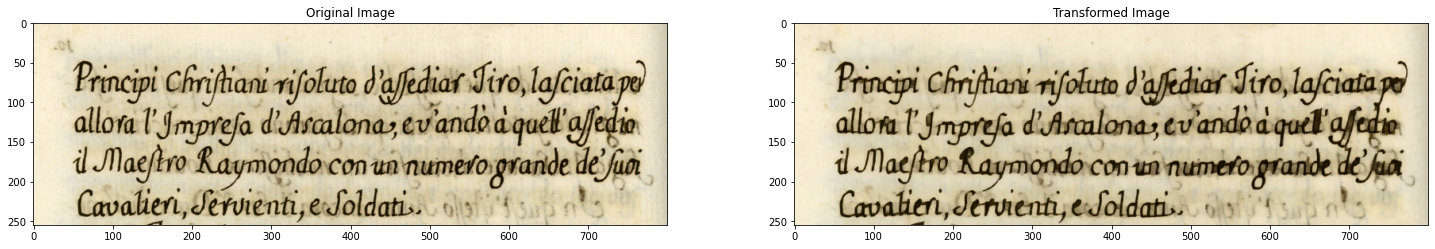

In [6]:
def opening(img, f1, f2):
    kernel = np.ones((f1, f2), np.uint8)
    return cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)



img = images[os.listdir("images")[2]][:,:,::-1]

output = opening(img, 4, 4)
showImages(img, output)

<b style="font-size:18px;">Exercise 1.4 - Closing</b>

Closing is an applied process of dilation followed by erosion. It is typically used to fill in shapes found within an image. It is also used in Text segmentation to reinforce eroded characters.

Using the same text image from previous exercises apply this process of opening to visually separate lines words and characters.


C:\Users\maxma\AppData\Local\Temp\ipykernel_2268\2604350079.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


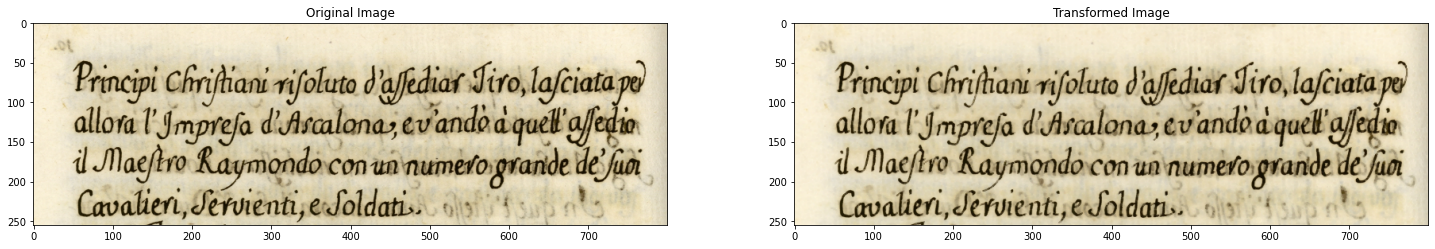

In [7]:
def closing(img, f1, f2):
    kernel = np.ones((f1, f2), np.uint8)
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)


img = images[os.listdir("images")[2]][:,:,::-1]
output = closing(img, 2, 2)
showImages(img, output)


<b style="font-size:18px;">Exercise 1.5 - Segmentation</b>

Using histograms, apply any of the morphological techniques used in the previous exercises to try and segment the text into seperate lines. The lines do not have to be perfect. 

##### Method 1: Using histograms

To start, it was determined that the best course of action is to remove any noise around the words. To do this the original image was first converted to grayscale, blurred, and then thresholder. This left just the words in black in the image. Next, the cv2.reduce() function was used to determine the intensity of thresholder values in each row. These where then used to determine the top and bottom of the lines by comparing 2 consecutive reduced values. If the 2 values where on different sides of a specified, separate, threshold value then that would have been considered a key point. These points, labelled uppers and lowers, where then plotted as lines on the image. Red lines on the image represent the top of a line, while green represent the bottoms. 
This technique appears to have created close to perfect bounding boxes around the lines. 



C:\Users\maxma\AppData\Local\Temp\ipykernel_2268\2604350079.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


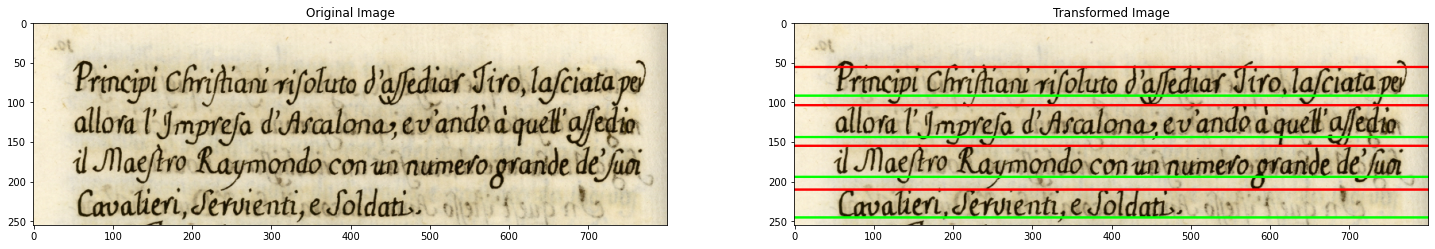

In [93]:
def segmentation(raw):
    rawG = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
    blur = cv2.blur(rawG, (6,6))
    thresh = cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY_INV)[1]

    output = closing(thresh, 3, 3)
    
    hist = cv2.reduce(output,1, cv2.REDUCE_AVG).reshape(-1)

    th = 155
    H,W = raw.shape[:2]
    uppers = [y for y in range(H-1) if hist[y]<=th and hist[y+1]>th]
    lowers = [y for y in range(H-1) if hist[y]>th and hist[y+1]<=th]

    thresh = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)

    copy = raw.copy()
    for y in uppers:
        cv2.line(copy, (0,y), (W, y), (255,0,0), 2)

    for y in lowers:
        cv2.line(copy, (0,y), (W, y), (0,255,0), 2)

    showImages(raw, copy)

img = images[os.listdir("images")[2]][:,:,::-1]
segmentation(img)

##### Method 2: Using Conected Components

This method was created alongside the previous implementation. While testing I found that by opening the image horizontally and closing the image vertically, a darker line would appear where a line of text was. After observing this, the connected component’s function was applied to the transformed image. This gave distinct, solid, coloured regions for each line. Find contours was then used to determine the region of the line. This was then overlayed on the original image.

C:\Users\maxma\AppData\Local\Temp\ipykernel_2268\622811092.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


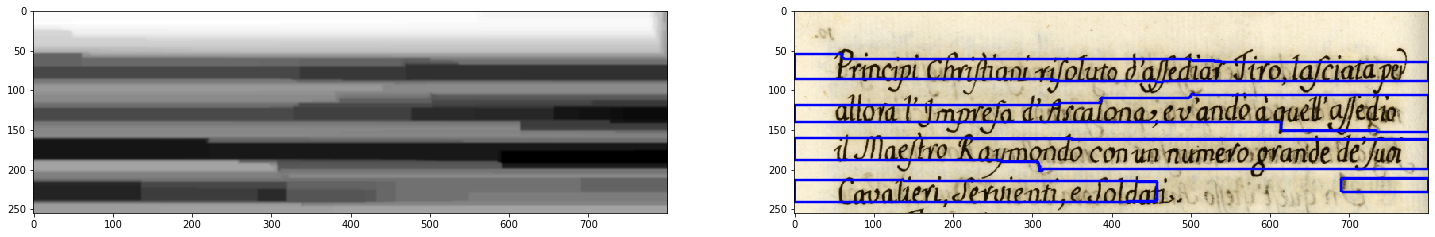

In [77]:
def imgHist(img):
    grayImage = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) #images[os.listdir("images")[2]]
    fig = plt.figure(figsize=(15, 10))
    ax1, ax2= fig.add_subplot(121), fig.add_subplot(122)
    ax1.imshow(img)
    hist,bin = np.histogram(img.ravel(), 256, [0,255])
    ax2.plot(hist)
    fig.show()
    
img = images[os.listdir("images")[2]][:,:,::-1]

temp = dilation(img, 10, 5)
temp = opening(temp, 1, 500)
temp = closing(temp, 15, 1)
contours = conComp(temp, 195)

img = np.array(img)
cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=[0, 0, 255], thickness=2, lineType=cv2.LINE_AA)
plt.imshow(img, interpolation='nearest')
plt.show()